# Is it possible to predict grades with Machine Learning? - DM1590 Final Project 

### Authors: Kajsa Lidin, Simon Berglund, Magdalena Eppens and Anton Yderberg.

### Background

Most schools care about their reputation and how well the students perform in their courses. However, it can be difficult to understand what factors lead a student to perform at a certain level. Is it just the time they dedicate to study? Or are there other factors that lead a student to get a certain grade? It is important to understand which factors that might affect grades to be able to understand students, especially in secondary grade when teachers have a close relationship with the students.

### Dataset

In this project, data from the Student Performance dataset, created by Barkha Verma, was used. The dataset contains information about 395 students from two different schools in Portugal. Each datapoint has 33 features, such as school, sex, age and adress (rural or urban). The dataset used for this project can be found att Kaggle through this link: https://www.kaggle.com/datasets/barkhaverma/student-performance.

### Methodology

The code in this file was used to understand how final grade is correlated with a couple of other features with the help of data from two portugese secondary schools. The file includes, but is not limited to: Data cleaning, PCA, Feature selection, Decision tree classification, Lasso regresion, linear regression, K-means clustering, DBSCAN, and evaluations. How it went is further discussed in the report "What Affects our Grades? - A look at Machine Learning-Based Grade prediction".

In [3]:
# LIBRARIES #
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import io
import sklearn
import graphviz

import sklearn.metrics  as metrics
import sklearn.cluster as cluster
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_validate, KFold, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectKBest, f_classif, mutual_info_classif
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.metrics import mean_squared_error, accuracy_score, classification_report, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.pipeline import make_pipeline
from graphviz import Source
from sklearn.cluster import DBSCAN
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import silhouette_score

%matplotlib inline

In [4]:
# READ CSV #
warnings.filterwarnings('ignore')
data = pd.read_csv('/content/student-por.csv', sep=",")

print(data)

    school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
0       GP   F   18       U     GT3       A     4     4   at_home   teacher   
1       GP   F   17       U     GT3       T     1     1   at_home     other   
2       GP   F   15       U     LE3       T     1     1   at_home     other   
3       GP   F   15       U     GT3       T     4     2    health  services   
4       GP   F   16       U     GT3       T     3     3     other     other   
..     ...  ..  ...     ...     ...     ...   ...   ...       ...       ...   
644     MS   F   19       R     GT3       T     2     3  services     other   
645     MS   F   18       U     LE3       T     3     1   teacher  services   
646     MS   F   18       U     GT3       T     1     1     other     other   
647     MS   M   17       U     LE3       T     3     1  services  services   
648     MS   M   18       R     LE3       T     3     2  services     other   

     ... famrel freetime  goout  Dalc  Walc health 

In [5]:
# SHOW SOME STATISTICS OF THE DATA #
data.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,16.744222,2.514638,2.306626,1.568567,1.930663,0.221880,3.930663,3.180277,3.184900,1.502311,2.280431,3.536210,3.659476,11.399076,11.570108,11.906009
std,1.218138,1.134552,1.099931,0.748660,0.829510,0.593235,0.955717,1.051093,1.175766,0.924834,1.284380,1.446259,4.640759,2.745265,2.913639,3.230656
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,16.000000,2.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,2.000000,0.000000,10.000000,10.000000,10.000000
50%,17.000000,2.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,2.000000,11.000000,11.000000,12.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,6.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000,19.000000,19.000000


In [6]:
# FIRST APPROACH TO THE DATASET #

# columns names #
data_names = ['school', 'sex', 'age', 'address', 'family_size', 'parent_cohabition_status', 'mother_education', 'father_education','mother_job', 'father_job', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'school_support', 'family_support', 'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences','grade_period1', 'grade_period2', 'final_grade' ]
data.columns = data_names

# numerical vs categorical columns #
numerical_columns = ['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1','grade_period2', 'final_grade']
categorical_columns = ["school","sex",'address', 'family_size', 'parent_cohabition_status','mother_job', 'father_job', 'reason', 'guardian',"school_support", "family_support",'paid', 'extra_curricular_activities', 'nursery', 'higher', 'internet_access', 'romantic']


In [7]:
data['grade_period1'].describe()
data = data.drop_duplicates()

print('Minimum grade:', data['final_grade'].min())
print('Maximum grade', data['final_grade'].max())
print('Minimum age:', data['age'].min())
print('Maximum age:', data['age'].max())

Minimum grade: 0
Maximum grade 19
Minimum age: 15
Maximum age: 22


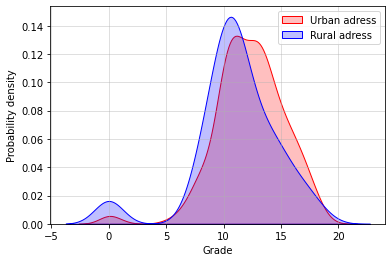

In [8]:
# Grade distribution by address #
sns.kdeplot(data.loc[data['address'] == 'U', 'final_grade'], label='Urban adress', color= 'r', shade = True)
sns.kdeplot(data.loc[data['address'] == 'R', 'final_grade'], label='Rural adress', color='b', shade = True)
plt.xlabel('Grade');
plt.ylabel('Probability density')
plt.legend()
plt.grid(alpha=0.5); plt.show()

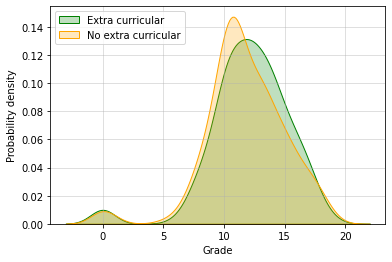

In [9]:
# Grade distribution based on if students have extra curricular activities or not #
sns.kdeplot(data.loc[data['extra_curricular_activities'] == 'yes', 'final_grade'], label='Extra curricular', color= 'green', shade = True)
sns.kdeplot(data.loc[data['extra_curricular_activities'] == 'no', 'final_grade'], label='No extra curricular', color= 'orange', shade = True)
plt.xlabel('Grade');
plt.ylabel('Probability density')
plt.legend(loc='upper left')
plt.grid(alpha=0.5); plt.show()

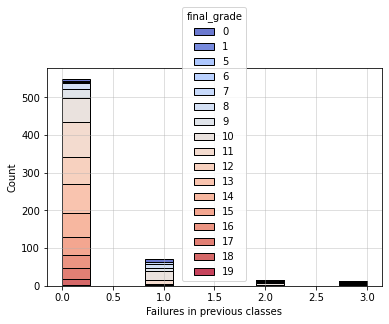

In [10]:
# How does failures in previous courses affect the final grade in this dataset? #
sns.histplot(data=data, x="failures", hue="final_grade", multiple="stack", palette='coolwarm')
plt.xlabel("Failures in previous classes")
plt.grid(alpha=0.5); plt.show()
# If a person has failures: 4, that means they didn't get a final grade

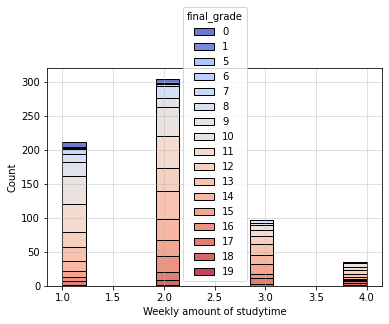

In [11]:
# How does weekly amount of studytime affect the final grade in this dataset? #
sns.histplot(data=data, x="studytime", hue="final_grade", multiple="stack", palette='coolwarm')
plt.xlabel("Weekly amount of studytime")
plt.grid(alpha=0.5); plt.show()
#  weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

## Data cleaning

In [12]:
# CLEAN THE DATABASE # 

# 3. Get the dummies so that it is easier to work. 
# This is, transform the categorical columns into numerical ones. 
# This is an example of One hot encoding
data_clean = pd.get_dummies(data, columns=categorical_columns)

# 4. Transform the data. 
# we need to standarize the data to take into consideration variations in measurments, units and scales. 
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[numerical_columns])
scaled_dataframe = pd.DataFrame(scaled_data, columns = numerical_columns)  
scaled_dataframe.head()

for column in numerical_columns:
  data_clean.append(scaled_dataframe[column])
  data_clean[column] = scaled_dataframe[column]

Let's make a Pearson correlation matrix to show how the features in the data correlate:

In [13]:
corr = data_clean.corr()
corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade,school_GP,school_MS,sex_F,sex_M,address_R,address_U,family_size_GT3,family_size_LE3,parent_cohabition_status_A,parent_cohabition_status_T,mother_job_at_home,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_at_home,father_job_health,father_job_other,father_job_services,father_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_support_no,school_support_yes,family_support_no,family_support_yes,paid_no,paid_yes,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
age,1.00,-0.11,-0.12,0.03,-0.01,0.32,-0.02,-0.00,0.11,0.13,0.09,-0.01,0.15,-0.17,-0.11,-0.11,-0.09,0.09,0.04,-0.04,0.03,-0.03,0.00,-0.00,0.01,-0.01,0.09,-0.10,0.04,-0.03,-0.05,0.06,-0.10,0.06,-0.02,-0.05,0.03,-0.01,-0.01,-0.02,-0.14,-0.05,0.33,0.17,-0.17,0.10,-0.10,0.01,-0.01,0.05,-0.05,0.02,-0.02,0.27,-0.27,-0.01,0.01,-0.18,0.18
mother_education,-0.11,1.00,0.65,-0.27,0.10,-0.17,0.02,-0.02,0.01,-0.01,-0.02,0.00,-0.01,0.26,0.26,0.24,0.25,-0.25,-0.12,0.12,-0.19,0.19,0.01,-0.01,0.06,-0.06,-0.38,0.26,-0.22,0.13,0.45,-0.10,0.16,-0.12,-0.01,0.26,-0.12,0.04,-0.03,0.13,-0.04,0.09,-0.10,0.02,-0.02,-0.12,0.12,-0.11,0.11,-0.12,0.12,-0.13,0.13,-0.21,0.21,-0.27,0.27,0.03,-0.03
father_education,-0.12,0.65,1.00,-0.21,0.05,-0.17,0.02,0.01,0.03,0.00,0.04,0.04,0.03,0.22,0.23,0.21,0.21,-0.21,-0.08,0.08,-0.14,0.14,0.04,-0.04,0.03,-0.03,-0.20,0.14,-0.20,0.10,0.31,-0.11,0.23,-0.22,0.03,0.35,-0.07,0.02,-0.03,0.09,0.09,-0.04,-0.07,-0.02,0.02,-0.14,0.14,-0.09,0.09,-0.08,0.08,-0.07,0.07,-0.19,0.19,-0.18,0.18,0.07,-0.07
traveltime,0.03,-0.27,-0.21,1.00,-0.06,0.10,-0.01,0.00,0.06,0.09,0.06,-0.05,-0.01,-0.15,-0.15,-0.13,-0.25,0.25,-0.04,0.04,0.34,-0.34,-0.01,0.01,-0.04,0.04,0.17,-0.10,0.03,-0.07,-0.10,-0.04,-0.09,0.10,-0.03,-0.04,0.13,-0.13,0.06,-0.08,0.02,-0.07,0.09,0.04,-0.04,0.04,-0.04,0.04,-0.04,0.03,-0.03,0.01,-0.01,0.07,-0.07,0.19,-0.19,-0.00,0.00
studytime,-0.01,0.10,0.05,-0.06,1.00,-0.15,-0.00,-0.07,-0.08,-0.14,-0.21,-0.06,-0.12,0.26,0.24,0.25,0.14,-0.14,0.21,-0.21,-0.06,0.06,0.01,-0.01,0.01,-0.01,-0.04,-0.02,-0.00,0.03,0.04,-0.01,0.10,-0.04,0.01,-0.02,-0.08,-0.01,-0.09,0.18,0.02,-0.02,0.01,-0.09,0.09,-0.14,0.14,0.00,-0.00,-0.07,0.07,-0.04,0.04,-0.19,0.19,-0.04,0.04,-0.03,0.03
failures,0.32,-0.17,-0.17,0.10,-0.15,1.00,-0.06,0.11,0.05,0.11,0.08,0.04,0.12,-0.38,-0.39,-0.39,-0.11,0.11,-0.07,0.07,0.06,-0.06,0.07,-0.07,0.01,-0.01,0.10,-0.02,-0.00,0.01,-0.12,0.04,-0.06,0.04,-0.01,-0.08,0.16,-0.08,0.00,-0.11,-0.07,-0.06,0.23,0.00,-0.00,0.01,-0.01,-0.07,0.07,-0.00,0.00,0.07,-0.07,0.31,-0.31,0.10,-0.10,-0.07,0.07
famrel,-0.02,0.02,0.02,-0.01,-0.00,-0.06,1.00,0.13,0.09,-0.08,-0.09,0.11,-0.09,0.05,0.09,0.06,0.03,-0.03,-0.08,0.08,0.03,-0.03,-0.00,0.00,-0.05,0.05,-0.01,-0.03,-0.01,0.04,-0.00,-0.08,0.01,0.02,0.04,-0.05,-0.02,-0.02,0.02,0.03,0.03,0.01,-0.07,0.01,-0.01,-0.02,0.02,-0.03,0.03,-0.06,0.06,-0.04,0.04,-0.05,0.05,-0.08,0.08,0.04,-0.04
freetime,-0.00,-0.02,0.01,0.00,-0.07,0.11,0.13,1.00,0.35,0.11,0.12,0.08,-0.02,-0.09,-0.11,-0.12,-0.03,0.03,-0.15,0.15,0.04,-0.04,0.02,-0.02,-0.04,0.04,-0.02,-0.02,-0.02,0.01,0.06,0.03,-0.02,0.04,-0.05,0.00,0.08,-0.06,-0.03,-0.01,-0.04,0.02,0.03,0.02,-0.02,-0.00,0.00,0.05,-0.05,-0.15,0.15,0.01,-0.01,0.10,-0.10,-0.06,0.06,-0.03,0.03
going_out,0.11,0.01,0.03,0.06,-0.08,0.05,0.09,0.35,1.00,0.25,0.39,-0.02,0.09,-0.07,-0.08,-0.09,-0.04,0.04,-0.06,0.06,-0.02,0.02,0.00,-0.00,-0.03,0.03,-0.04,0.04,0.01,0.04,-0.06,-0.01,0.03,0.04,-0.03,-0.04,0.01,-0.01,0.00,-0.00,-0.06,0.04,0.02,0.06,-0.06,-0.02,0.02,0.01,-0.01,-0.09,0.09,-0.02,0.02,0.07,-0.07,-0.09,0.09,0.00,-0.00
workday_alcohol,0.13,-0.01,0.00,0.09,-0.14,0.11,-0.08,0.11,0.25,1.00,0.62,0.06,0.17,-0.20,-0.19,-0.20,-0.05,0.05,

In [14]:
# Here we can see more clearly the correlations for only the target variable.

x = corr[['final_grade']]
x.T.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2)

,age,mother_education,father_education,traveltime,studytime,failures,famrel,freetime,going_out,workday_alcohol,weekend_alcohol,health,absences,grade_period1,grade_period2,final_grade,school_GP,school_MS,sex_F,sex_M,address_R,address_U,family_size_GT3,family_size_LE3,parent_cohabition_status_A,parent_cohabition_status_T,mother_job_at_home,mother_job_health,mother_job_other,mother_job_services,mother_job_teacher,father_job_at_home,father_job_health,father_job_other,father_job_services,father_job_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,school_support_no,school_support_yes,family_support_no,family_support_yes,paid_no,paid_yes,extra_curricular_activities_no,extra_curricular_activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_access_no,internet_access_yes,romantic_no,romantic_yes
final_grade,-0.11,0.24,0.21,-0.13,0.25,-0.39,0.06,-0.12,-0.09,-0.20,-0.18,-0.10,-0.09,0.83,0.92,1.00,0.28,-0.28,0.13,-0.13,-0.17,0.17,-0.05,0.05,0.00,-0.00,-0.14,0.10,-0.06,0.04,0.13,-0.04,0.04,-0.01,-0.05,0.13,-0.10,0.05,-0.13,0.17,0.05,-0.00,-0.08,0.07,-0.07,-0.06,0.06,0.05,-0.05,-0.06,0.06,-0.03,0.03,-0.33,0.33,-0.15,0.15,0.09,-0.09


In [15]:
# CORRELATION MATRIX WITH LESS VARIABLES # 
# FUNCTION #

# 1. create the function 
def corr_matrix(chosen_columns):
  bm = data_clean.columns.isin(chosen_columns)
  sc = data_clean.columns[bm]
  df=data_clean[sc]
  corr = df.corr()
  return(corr.style.background_gradient(cmap='coolwarm', axis=None).set_precision(2))

# 2.choose the variables in which we want to see the correlation
chosen = ["sex_M","sex_F","internet_access_no","romantic_yes","paid_yes", "final_grade"]

# 3. call the function 
corr_matrix(chosen)

,final_grade,sex_F,sex_M,paid_yes,internet_access_no,romantic_yes
final_grade,1.00,0.13,-0.13,-0.05,-0.15,-0.09
sex_F,0.13,1.00,-1.00,-0.08,0.07,0.11
sex_M,-0.13,-1.00,1.00,0.08,-0.07,-0.11
paid_yes,-0.05,-0.08,0.08,1.00,-0.03,-0.02
internet_access_no,-0.15,0.07,-0.07,-0.03,1.00,-0.03
romantic_yes,-0.09,0.11,-0.11,-0.02,-0.03,1.00


In [16]:
# These features seem to have the highest correlation with final_grade
print(corr.abs().nlargest(10, 'final_grade').index)

Index(['final_grade', 'grade_period2', 'grade_period1', 'failures',
       'higher_no', 'higher_yes', 'school_GP', 'school_MS', 'studytime',
       'mother_education'],
      dtype='object')


We can see that grade_period2 and grade_period1 are the features with the highest correlation with the final grade according to the Pearson correlation matrix, which makes sense since it is the same student with the same conditions. 

## Train/test/validation split 

In [17]:
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X=data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"]) # target variable
s = data_clean.columns[boolean_mask_target]
y=data_clean[s]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True) # 0.25 x 0.8 = 0.2, validation set is 20% of training set


In [18]:
# FURTHER CLEANING #
# These features cause to much bias for models with the task of predicting final grades.
data_without_G1_G2 = data_clean.drop(["grade_period1","grade_period2"], axis=1)

## Principal Component Analysis

Principal Component Analysis (PCA) is a method used to reduce the complexity of large data sets by transforming a set of variables into a smaller, more manageable one while still retaining most of the original data's key features. We will mainly use PCA as an analysis tool to further examine the relationships of the data.

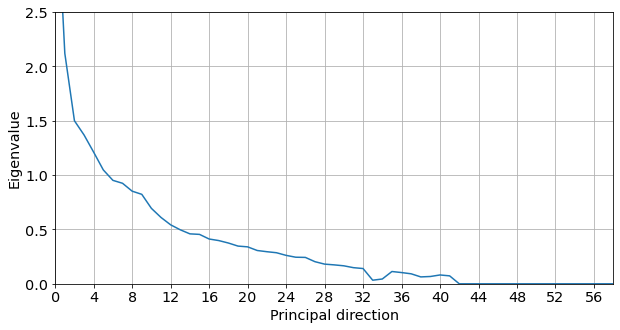

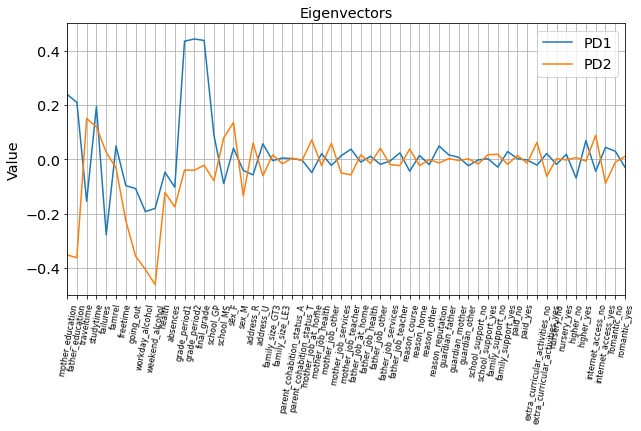

In [19]:
# EIGENVECTORS AND EIGENVALUES #

# 1. Get the covariance matrix
cov = data_clean.cov()

# 2. Computes the eigenvalue and eigenvector of the square.
# The eigenvectors are the directions in which the data varies the most --> L
# The eigenvalues represent the magnitude of the variance in those directions -->  Q
L,Q = np.linalg.eig(cov)

# 3. Plotting the eigenvalues. 
# The plot will show the importance of each principal component in terms of
# the amount of variance it captures. The first principal component will have the 
# largest eigenvalue, followed by the second, and so on. The plot can help you decide 
# how many principal components to retain based on a certain amount of variance explained, 
# or it can be used to visualize the structure of the data in a lower-dimensional space.

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(L)),L)
plt.xticks(ticks = range(len(L)))
plt.ylabel('Eigenvalue')
plt.xlabel('Principal direction')
plt.xlim((1, len(L)-1))
plt.xticks(range(0,60,4))

plt.ylim((0,2.5))
ax.grid()
plt.show()

# 4. Plotting eigenvectors. 
# Now, we'll proceed to plot the 2 eigenvectors in Q having the largest eigenvalues. 
# The plot can be useful for visualizing the structure of the data in a lower-dimensional 
# space and for identifying any patterns or clusters in the data.

print("\n")
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(L)),Q[:,0:2])
plt.xticks(ticks = range(len(L)), labels=data_clean.columns,rotation=80, fontsize=8)
ax.legend(labels=['PD1','PD2'])
plt.ylabel('Value')
plt.xlim((1, len(L)-1))
plt.ylim((-0.5,0.5))
plt.title("Eigenvectors")
ax.grid()
plt.show()
     

Principal components are new variables that are constructed as linear combinations or mixtures of the initial variables. These combinations are done in such a way that the new variables (i.e., principal components) are uncorrelated and most of the information within the initial variables is squeezed or compressed into the first components. 

So, the idea is 10-dimensional data gives you 10 principal components, but PCA tries to put maximum possible information  in the first component, then maximum remaining information in the second and so on. Organizing information in principal components this way, will allow us to reduce dimensionality without losing much information. An important thing to realize here is that the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.

How to Select the Best Number of Principal Components for the Dataset?

 1. Scree plot method. 2. Cumulative explained variance 3. Cross validation

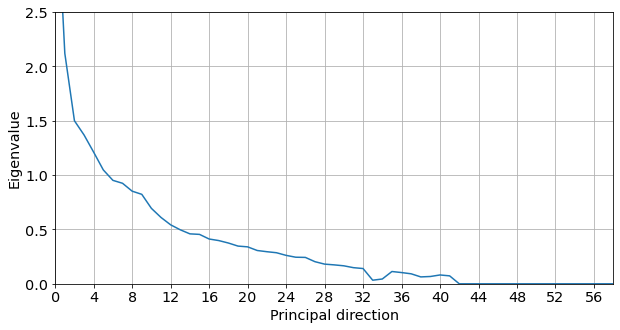

In [20]:
# PCA #
# Method 1: Scree plot method
# This one takes the same criteria as the elbow plot. 

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(len(L)),L)
plt.xticks(ticks = range(len(L)))
plt.ylabel('Eigenvalue')
plt.xlabel('Principal direction')
plt.xlim((1, len(L)-1))
plt.xticks(range(0,60,4))

plt.ylim((0,2.5))
ax.grid()
plt.show()

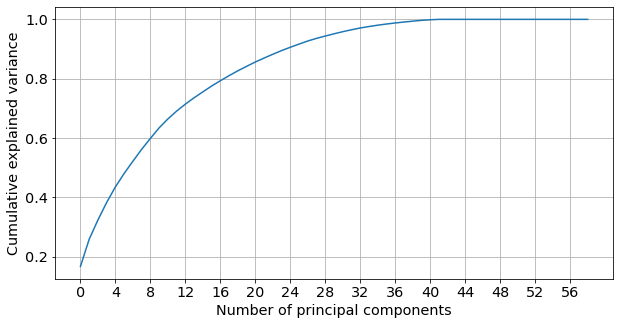

In [21]:
# PCA #
# Method 2: Cumulative explained variance. 
# Usually, one seeks to have an explained variance between 0.6 and 0.8. 

pca = PCA().fit(data_clean)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of principal components')
plt.ylabel('Cumulative explained variance')
plt.xticks(range(0,60,4))
plt.grid() 

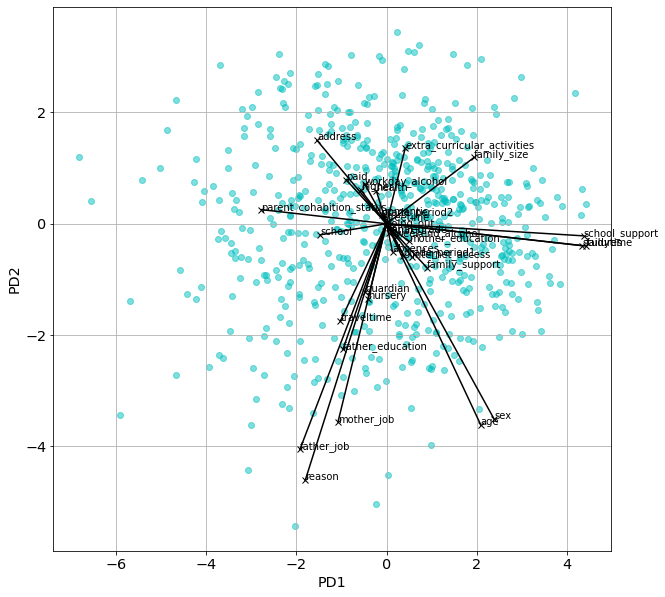

In [22]:
x = data_clean.to_numpy()

Xproj = np.dot(Q[:,(0,1)].T,(x-x.mean(axis=0)).T).T

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 10),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig = plt.figure()
ax = fig.add_subplot(111)

hand = ax.scatter(Xproj[:,0],Xproj[:,1],alpha=0.5, color="c")

# add the standard basis
for dim in range(len(data.columns)):
  ax.plot((0,10*Q[dim,0]),(0,10*Q[dim,1]),c='black')
  ax.text(10*Q[dim,0],10*Q[dim,1],data.columns[dim],fontsize=10)
  ax.plot(10*Q[dim,0],10*Q[dim,1],marker='x',c='black')

plt.xlabel('PD1')
plt.ylabel('PD2')
ax.grid()
plt.show()

In this graph, we see for example that grade_period2 point in the same direction as free time and school support, as well as study time and failures. 

Another trend we can see in this particular dataset is that the parents' of the students seems to be in a similar line of work. It is peculiar though, that mother_job and father_job point in the same direction as father_education, but not mother_education.

## Feature selection

Feature selection is the process of identifying and selecting a subset of the most relevant and informative features from a larger set of variables in a dataset. In this project we do this with SelectKBest, but also with Lasso, as we will see later.

In [23]:
# Creating a SelectKBest object to perform feature selection, which will be used for making the models more accurate
# We have also used feature selection with the Lasso model, which we will try out in the Lasso section.
k_best = SelectKBest(f_classif,k=8)
X_new = k_best.fit_transform(X, y) 
sel_mask = k_best.get_support()
featurenames = X.columns
print("Selected features are:")
for nn in np.where(sel_mask)[0]:
  print(featurenames[nn])

Selected features are:
age
mother_education
father_education
failures
workday_alcohol
school_GP
school_MS
higher_yes


In [24]:
list_wit_features = []
features_selected = np.argwhere(k_best.get_support())
for ff in features_selected:
    list_wit_features.append(X_train.columns[ff][0])
print(list_wit_features)

['age', 'mother_education', 'father_education', 'failures', 'workday_alcohol', 'school_GP', 'school_MS', 'higher_yes']


## Linear regression

Linear regression is an analysis method used for predicting values of a variable based on one or several other variables, where the variable which values are being predicted is called the dependent variable and the rest are independent.

In [25]:
# 1. Split into training, testing and validation data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X_lr =data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y_lr = data_clean[s]

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, shuffle=True)
X_train_lr, X_val_lr, y_train_lr, y_val_lr = train_test_split(X_train_lr, y_train_lr, test_size=0.25, shuffle=True) # 0.25 x 0.8 = 0.2, validation set is 20% of training set

# 2. Fit the model, get the prediction and get the accuracy.
linear_model = LinearRegression()
linear_model.fit(X_train_lr, y_train_lr)
print("Linear regression:")

y_pred = linear_model.predict(X_val_lr)

print("Accuracy:", linear_model.score(X_val_lr,y_val_lr))   # linear_model.score uses R-squared metric by default

mse_tot = mean_squared_error(y_val_lr, y_val_lr)  

print("Mean squared error: %.10f" % mse_tot)  

# 3. Get the coefficients of the regression model:
coefficient={}
for feat in X_train_lr.columns:
  coefficient[feat]=linear_model.coef_

# print(coefficient["traveltime"])

Linear regression:
Accuracy: 0.8666420831285546
Mean squared error: 0.0000000000


In [26]:
# TESTING ON UNSEEN DATA #

y_pred_new = linear_model.predict(X_test_lr)  

print("Accuracy:", linear_model.score(X_test_lr,y_test_lr))   # linear_model.score uses R-squared metric by default
mse_tot = mean_squared_error(y_test_lr, y_pred_new)

print("Mean squared error: %.10f" % mse_tot)

Accuracy: 0.7804819820791937
Mean squared error: 0.1922211160


The accuracy dropped a bit, which is expected.

Measuring the success with cross-validation will yield a more trustable accuracy and prevents the consequences of drawing conclusions from a "lucky" or "unlucky" sample.

In [27]:
# CROSS-VALIDATION #

boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_clean.columns[boolean_mask]
X_lr =data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y_lr = data_clean[s]

X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.2, shuffle=True)

# The data will be split into 10 equal parts, and the model will be trained and 
# evaluated 10 times. 
folds = 10

# 3. Evaluate the linear regression model using cross validation. 

# Linear regression is a supervised machine learning algorithm used for predicting a 
# continuous target variable based on one or more input features that have a linear
# relationship with the target variable.

# The linear regression model assumes that the relationship between the input 
# features and the target variable can be modeled using a linear function, which 
# is a straight line in the case of a single input feature or a plane in the case of multiple input features.

kf = KFold(n_splits=folds, shuffle=True, random_state=42)
linear_model = LinearRegression()
scores = cross_val_score(linear_model, X_lr, y_lr, cv=kf)

# 4. Print the cross-validation scores
print("Validation scores:")
l=len(scores)
for i in range(l):
  print(i+1,":",scores[i])

# 5. Average score
# The results of the cross validation are averaged across the k 
# folds to produce an overall estimate of the model's performance.
# The average score represents the average performance of the ML model across all folds of the cross-validation.
print("\n")
print("Average score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

Validation scores:
1 : 0.9169962093158238
2 : 0.7876453421824321
3 : 0.9037035430698711
4 : 0.7480769726059067
5 : 0.7814969368108162
6 : 0.7680183075328676
7 : 0.8496946502725672
8 : 0.8790695878529428
9 : 0.8016515891461354
10 : 0.9173360796958399


Average score: 0.8353689218485203
Standard deviation: 0.062160118396198824


In [28]:
# Which were the predicted grades? #

# Now we want to examine what the predicted grade values actually is, in the shape and form they originally have in the dataset. 

y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("Mean of predicted grades:", y_pred_rescaled.mean())

Mean of predicted grades: 12.001449713932844


Side note: the data is splitted randomly with shuffle = True for each run, which will result in slightly different values.

One thing that is important to note is that two of the features that affects these results the most are 'grade_period1' and 'grade_period2', which are also measures of grades. These have, as we can see, a very high correlation with the final grade, which is problematic. We have a biased model.We should try just how much the current accuracy depends on these by removing them from the data.

For science sake, we have to test how the model performs without these features.

### Linear regression without grade_period1 and grade_period2

From now on, we will use the train/test split defined earlier, where labels "grade_period1" and "grade_period2" have been dropped. This is so that all the models using these values of X and y gets the same random split, so that they can be compared with each other and are easy to implement.

In [29]:
# Fit the model, get the prediction and get the accuracy.
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
print("Linear regression:")

y_pred = linear_model.predict(X_val)

kf = KFold(n_splits=folds, shuffle=True, random_state=42)
scores = cross_val_score(linear_model, X, y, cv=kf)

# Print the cross-validation scores
print("Validation scores:")
l=len(scores)
for i in range(l):
  print(i+1,":",scores[i])

# Average score
print("\n")
print("Average score:", np.mean(scores))
print("Standard deviation:", np.std(scores))

mse_tot = mean_squared_error(y_test, y_pred)  

print("Mean squared error: %.10f" % mse_tot)  

# Get the coefficients of the regression model:
coefficient={}
for feat in X_train_lr.columns:
  coefficient[feat]=linear_model.coef_

# print(coefficient["traveltime"])

Linear regression:
Validation scores:
1 : 0.0610706555851781
2 : 0.17401736037303817
3 : 0.3477795280161443
4 : 0.34150699168155585
5 : 0.35843582694845544
6 : 0.22029841484754908
7 : 0.2963938105016166
8 : 0.28746024929556624
9 : 0.10630404936091642
10 : 0.21583387346314542


Average score: 0.24091007600731654
Standard deviation: 0.09827908029623988
Mean squared error: 1.2695607067


We are getting a much lower accuracy after the grades from previous periods are dropped from the data. This was expected, since these features had such a high correlation with the final grade. This accuracy is a better representation of how the linear regression model actually performs, since it the data doesn't contain bias of how the grades should look. 

In the next chapter, where we will implement a Lasso regression model, we will first take a look at how the model performs with all of the data, and then with the data without "grade_period1" and "grade_period2".

## Lasso regression

Lasso (Least Absolute Shrinkage and Selection Operator) is another type of regression method that uses a L1 regularization technique which adds a penalty term that is equal to the absolute value of the magnitude of coefficients, which means it limits the coefficients’ size.

In [30]:
# A function to determine which will be the best alpha value for Lasso regression in following cell.

alphas = np.arange(0,1,0.001).tolist()
def best_alpha(X, y, alpha_values=alphas):
    """
    Here we can test which the best alpha value is, using cross-validation for a Lasso model.

    Input: X is a feature matrix and y is a target vector. 
    
    We will test all alpha values in the list of alpha values.
    """
    
    lasso = LassoCV(alphas=alpha_values, cv=5, random_state=42)
    lasso.fit(X, y)
    
    best_alpha = lasso.alpha_
    
    return best_alpha

In [31]:
# 1. Split into training and testing data.
boolean_mask = data_clean.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'grade_period1', 'grade_period2', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])

sc = data_clean.columns[boolean_mask]
X_lasso = data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y_lasso = data_clean[s]

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, shuffle=True)
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X_train_lasso, y_train_lasso, test_size=0.25, shuffle=True)

# 2. Fit the model and get the accuracy.
best_alpha_for_lasso = best_alpha(X_train_lasso, y_train_lasso)
print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train_lasso, y_train_lasso)

# 3. Make the predictions, first on the validation set to measure suitability of the model.
y_pred = lasso_model.predict(X_val_lasso)


# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val_lasso,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val_lasso,y_val_lasso)

print("R2:",r2)


# 6. Get Lasso coefficients and select a few features to improve the model accuracy
sel = SelectFromModel(lasso_model)
removed_features = X_train_lasso.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
chosen_features = X_train_lasso.columns[(sel.estimator.coef_ != 0).ravel().tolist()]

print("Selected features with Lasso:", "\n", chosen_features)

The alpha value we will use is: 0.013000000000000001
Slope 0.0
Intercept: [-0.03511717]


Mean squared error: 0.19160317345681765
R2: 0.8276634347794285
Selected features with Lasso: 
 Index(['father_education', 'traveltime', 'studytime', 'failures', 'going_out',
       'weekend_alcohol', 'absences', 'grade_period1', 'grade_period2',
       'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R',
       'mother_job_other', 'reason_course', 'family_support_yes'],
      dtype='object')


In [32]:
# LASSO REGRESSION AFTER FEATURE SELECTION #

boolean_mask = data_clean.columns.isin(chosen_features.tolist())
sc = data_clean.columns[boolean_mask]
X_lasso = data_clean[sc]

boolean_mask_target = data_clean.columns.isin(["final_grade"])
s = data_clean.columns[boolean_mask_target]
y_lasso = data_clean[s]

X_train_lasso, X_test_lasso, y_train_lasso, y_test_lasso = train_test_split(X_lasso, y_lasso, test_size=0.2, shuffle=True)
X_train_lasso, X_val_lasso, y_train_lasso, y_val_lasso = train_test_split(X_train_lasso, y_train_lasso, test_size=0.25, shuffle=True)

# 2. Fit the model and get the accuracy.
# best_alpha_for_lasso = best_alpha(X_train, y_train)
# print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train_lasso, y_train_lasso)

# 3. Make the predictions on the validation set.
y_pred = lasso_model.predict(X_val_lasso)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val_lasso,y_val_lasso)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val_lasso,y_val_lasso)
print("R2:",r2)

Slope 0.015162190731317146
Intercept: [-0.09650614]


Mean squared error: 0.0
R2: 0.7590564818213453


In [33]:
# Now that we are happy with the model, we test the actual accuracies on the test set

y_pred_new = lasso_model.predict(X_test_lasso)

mse = mean_squared_error(y_test_lasso,y_test_lasso)
print("Mean squared error:", mse)

r2=lasso_model.score(X_test_lasso,y_test_lasso)
print("R2:",r2)

Mean squared error: 0.0
R2: 0.8646349577783384


### Lasso without "grade_period1" and "grade_period2" 

The final Lasso model will not be biased by grades in previous periods.

In [34]:
# Fit the model and get the accuracy.
best_alpha_for_lasso = best_alpha(X_train, y_train)
print("The alpha value we will use is:", best_alpha_for_lasso)
lasso_model = Lasso(alpha = best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# Make the predictions, first on the validation set to measure suitability of the model.
y_pred = lasso_model.predict(X_val)


# Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val,y_pred)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val,y_val)

print("R2:",r2)

# Get Lasso coefficients and select a few features to improve the model accuracy
sel = SelectFromModel(lasso_model)
removed_features = X_train.columns[(sel.estimator.coef_ == 0).ravel().tolist()]
chosen_features = X_train.columns[(sel.estimator.coef_ != 0).ravel().tolist()]

print("Selected features with Lasso:", "\n", chosen_features)

The alpha value we will use is: 0.018000000000000002
Slope 0.007557656610446676
Intercept: [-0.59894979]


Mean squared error: 0.6812581525724312
R2: 0.31573118780538934
Selected features with Lasso: 
 Index(['age', 'father_education', 'studytime', 'failures', 'famrel',
       'freetime', 'workday_alcohol', 'weekend_alcohol', 'health', 'absences',
       'school_GP', 'school_MS', 'sex_F', 'address_R', 'mother_job_health',
       'mother_job_other', 'father_job_services', 'guardian_mother',
       'school_support_yes', 'nursery_yes', 'higher_yes',
       'internet_access_yes'],
      dtype='object')


In [35]:
# LASSO REGRESSION AFTER FEATURE SELECTION #

X_sel = data_without_G1_G2[chosen_features.tolist()]

boolean_mask_target = data_without_G1_G2.columns.isin(["final_grade"])
s = data_without_G1_G2.columns[boolean_mask_target]
y=data_without_G1_G2[s]

X_train, X_test, y_train, y_test = train_test_split(X_sel, y, test_size=0.2, shuffle=True)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, shuffle=True)

lasso_model=Lasso(alpha=best_alpha_for_lasso)
lasso_model.fit(X_train, y_train)

# 3. Make the predictions on the validation set.
y_pred = lasso_model.predict(X_val)

# 4. Get the slope and the intercept. 
# y = mx + b, where m represents the slope and b represents the y-intercept.
print("Slope",lasso_model.coef_[0])
print("Intercept:",lasso_model.intercept_)
print("\n")

# 5. Evaluate the performance of our model
# Method 1: mean squared error
# Disadvantage it's difficult to evaluate the performance of the model using MSE as the value of MSE can vary from 0 to any larger number
mse = mean_squared_error(y_val,y_val)
print("Mean squared error:", mse)

# Method 2: R2.
# The value of R2 varies between 0 and 1. 
r2=lasso_model.score(X_val,y_val)
print("R2:",r2)

Slope 0.0030783604570775273
Intercept: [-0.5317505]


Mean squared error: 0.0
R2: 0.2787127155382585


In [36]:
# Now we test the actual accuracies on the test set

y_pred_new = lasso_model.predict(X_test)

mse = mean_squared_error(y_test,y_test)
print("Mean squared error:", mse)

r2=lasso_model.score(X_test,y_test)
print("R2:",r2)

Mean squared error: 0.0
R2: 0.3763395015470269


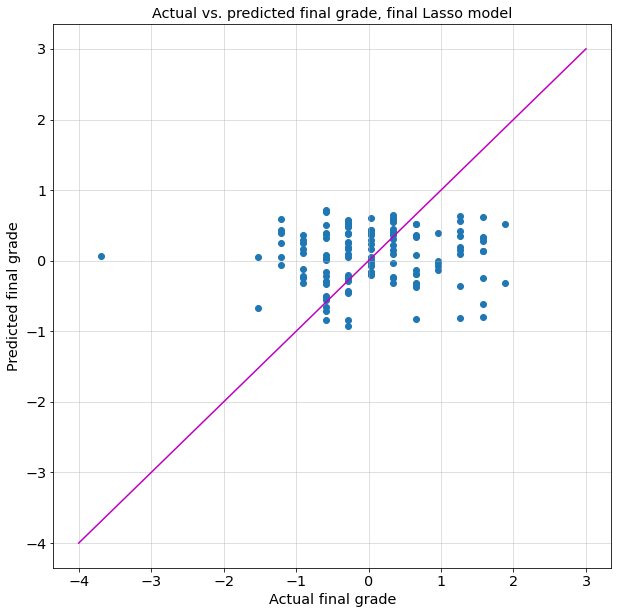

In [37]:
x = np.arange(-4, 4, 1)
plt.scatter(y_test_lasso, y_pred_new)
plt.xlabel("Actual final grade")
plt.ylabel("Predicted final grade")
plt.plot(x, x, color='m')
plt.title("Actual vs. predicted final grade, final Lasso model")
plt.grid(alpha=0.5); plt.show()

This plot is just a visualization of the prediction of the final grades vs the actual grades. In a perfect model, this would line up with the line y=x, which we can see that it doesn't do.

In [38]:
y_pred_rescaled = y_pred * data["final_grade"].std() + data["final_grade"].mean()
# print(y_pred_rescaled)   # these are the predicted grades in their original form
print("Mean of predicted grades:", y_pred_rescaled.mean())

Mean of predicted grades: 11.75974834236604


This is the average predicted grade. It should not be trusted since the model is performing so poorly.

## K-means clustering

K-means clustering is an unsupervised machine learning algorithm used for grouping data points into K distinct clusters based on their similarity. It works by iteratively partitioning the dataset into K groups, where each group (cluster) is represented by its centroid or mean value.

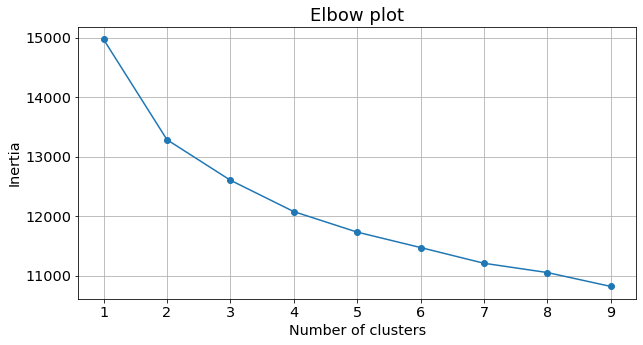



Silhouette method:
Silhouette score for k (clusters) = 2 is 0.11333391509438047
Silhouette score for k (clusters) = 3 is 0.06752484686386223
Silhouette score for k (clusters) = 4 is 0.07199776784435709
Silhouette score for k (clusters) = 5 is 0.05725816099761751
Silhouette score for k (clusters) = 6 is 0.049017575590438046
Silhouette score for k (clusters) = 7 is 0.0473258108480826
Silhouette score for k (clusters) = 8 is 0.04775985824607974
Silhouette score for k (clusters) = 9 is 0.04290048844251386


In [39]:
# CHOOSING THE OPTIMAL K VALUE #
# there is various methods to choose the optimun value of k. We'll start using the elbow plot method,
# and then proceed to the silhouette method. 
# The Elbow Method is more of a decision rule, while the Silhouette is a metric used for validation while clustering. 

# 1. ELBOW PLOT
# the elbow plot alows us to plot inercia (measure of how well the data was clustered by the KM alg) against the number of clusters. 
def optimise_k(data,max_k):
  means=[]
  inertias=[]
  for k in range(1,max_k):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(data)
    means.append(k)
    inertias.append(kmeans.inertia_)

  fig=plt.subplots(figsize=(10,5))
  plt.plot(means,inertias,"o-")
  plt.xlabel("Number of clusters")
  plt.ylabel("Inertia")
  plt.grid(True)
  plt.title("Elbow plot", size=18)
  plt.show()

optimise_k(data_clean,10)
# Optimun value of k: 4. 

# 2. THE SILHOUETTE METHOD
# The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).
print("\n")
print("Silhouette method:")
for i in range(2,10):
  labels=cluster.KMeans(n_clusters=i, init="k-means++",random_state=200).fit(data_clean).labels_
  print("Silhouette score for k (clusters) = "+str(i)+" is " + str(metrics.silhouette_score(data_clean,labels,metric="euclidean", sample_size=1000,random_state=200)))


[0 1 1 2 2 2 1 2 2 2 2 1 2 2 2 2 2 2 0 2 2 2 2 3 1 1 1 3 2 3 3 2 2 2 1 1 2
 2 2 1 1 3 2 1 3 2 2 2 2 2 1 2 3 2 3 1 2 2 1 2 2 3 1 2 2 2 3 1 1 1 1 1 1 1
 3 2 1 1 0 2 1 1 1 1 1 2 1 2 1 3 1 2 1 2 1 1 2 1 2 2 3 2 2 1 2 1 1 2 3 2 2
 1 1 2 1 2 2 2 3 2 1 2 2 2 1 3 2 0 3 1 2 0 1 1 1 2 1 1 1 2 3 1 3 3 1 1 0 2
 0 1 3 2 1 2 3 3 1 1 1 1 1 3 3 0 3 2 0 2 1 0 0 1 3 3 0 0 3 0 3 0 3 2 1 2 3
 1 2 1 2 3 1 3 3 2 2 2 2 2 2 2 1 1 2 1 1 1 3 3 1 2 2 3 2 2 2 1 1 1 1 3 1 2
 1 2 2 3 1 3 2 2 3 3 1 1 1 1 1 3 2 1 2 1 3 1 2 1 2 2 1 1 3 1 2 0 0 0 0 2 2
 1 1 1 0 3 1 1 2 2 2 2 2 2 1 1 1 1 1 1 1 0 3 1 3 1 0 1 1 0 1 2 1 3 2 1 1 2
 2 1 1 1 2 2 1 2 1 3 2 3 2 2 0 3 2 1 2 1 2 3 1 2 2 1 0 2 3 3 3 1 1 1 1 1 2
 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 1 3 3
 0 3 1 1 2 1 1 2 2 3 2 2 3 3 3 1 2 2 2 1 1 2 2 2 2 2 2 1 1 2 2 2 2 1 2 3 1
 0 3 2 2 2 2 0 1 3 2 2 3 3 2 0 1 1 1 1 3 2 0 2 1 0 0 3 1 1 0 1 3 2 3 3 2 1
 3 3 2 3 2 1 2 1 1 0 0 1 1 3 1 1 1 1 1 1 3 0 1 1 1 2 2 3 1 3 3 1 1 3 0 0 0
 0 1 1 0 1 0 0 0 0 0 0 1 

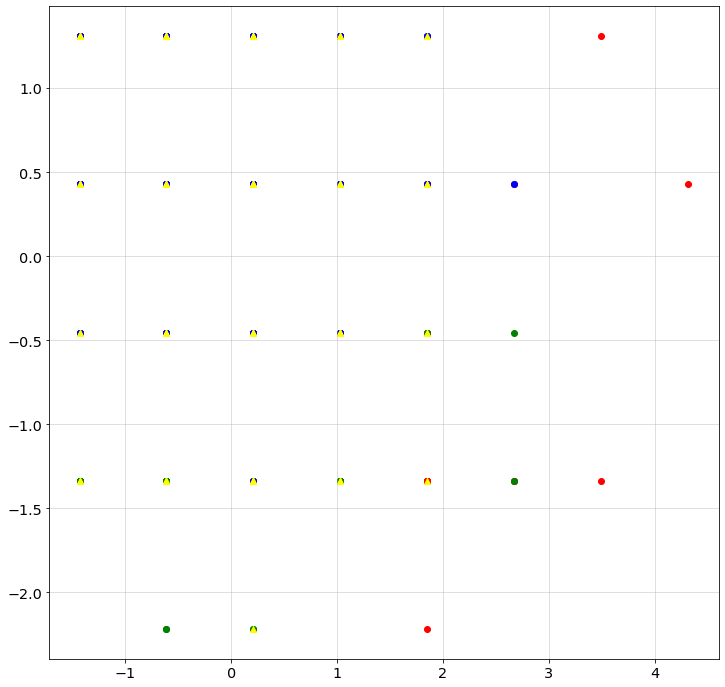

In [40]:
# CLUSTERING #

# 1. APPLY K-MEANS CLUSTERING

X = data_clean.drop('final_grade', axis=1)
y = data_clean['final_grade']

kmeans = KMeans(n_clusters=4)
label=kmeans.fit(data_clean)

# 2. ADD THE COLUMN OF THE CLUSTER (optional)
data_clean["kmeans_4"]=kmeans.labels_

# predict the labels of clusters.
label = kmeans.fit_predict(data_clean)
 
print(label)

#filter rows of original data

params = {'legend.fontsize': 'x-large','figure.figsize': (12, 12),
         'axes.labelsize': 'x-large','axes.titlesize':'x-large',
         'xtick.labelsize':'x-large','ytick.labelsize':'x-large'}
plt.rcParams.update(params)

fig, ax = plt.subplots()

filtered_label0 = data_clean[label == 0]
 
filtered_label1 = data_clean[label == 1]

filtered_label2 = data_clean[label == 2]

filtered_label3 = data_clean[label == 3]
 
#Plotting the results
plt.scatter(filtered_label0.iloc[:,0] , filtered_label0.iloc[:,1] , color = 'red')
plt.scatter(filtered_label1.iloc[:,0] , filtered_label1.iloc[:,1] , color = 'green')
plt.scatter(filtered_label2.iloc[:,0] , filtered_label2.iloc[:,1] , color = 'blue')
plt.scatter(filtered_label3.iloc[:,0] , filtered_label3.iloc[:,1] , color = 'yellow', marker='^')

plt.grid(alpha=0.5); plt.show()

Since we do not know the true clusters in this case, we cannot use this plot to visually check if the generated clusters match the true clusters. However, this plot can still be useful for exploring the structure of the data and identifying any potential patterns or separations in the data.We can see from the colors of the points that the points are not really grouped together as expected. A lot of the yellow points, with label "3" was placed rather close to each other. However, the green, blue and red points seems to have placements based on other patterns it found. 

## DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) is an unsupervised machine learning algorithm used for clustering data points based on their spatial density. Unlike K-means clustering, which assumes that clusters are spherical and evenly sized, DBSCAN can find clusters of any shape and size.

In [41]:
Scan = DBSCAN()
temp = Scan.fit_predict(X)
print(temp)
print("\033[1m" + "We notice that everything is labeled as noice (we have to change esp and min sampels)"+ "\033[0;0m")

[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1

0.7425833481136442 12.991391054522692


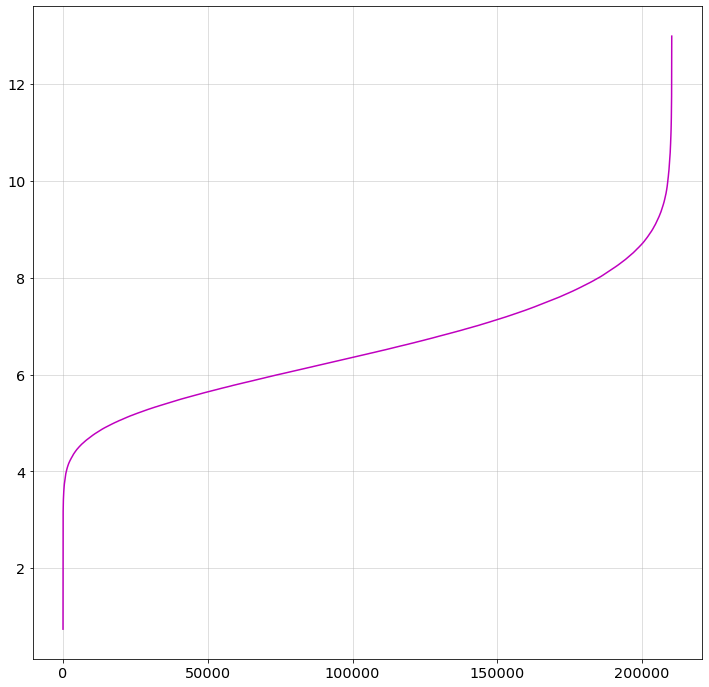

In [42]:
# Calulating the distance between all data points an using the elbow method to find the optimal eps for full dataset 
def distance_function(X=X, max_range = 649): 
    distance_arr = np.array(X)


    D = []
    for i in range(0, 649):
        j = i +1
        while j < 649:
            distances = np.linalg.norm(((distance_arr[i,:])) - np.array(distance_arr[j,:]))
            if distances != 0:    # we don't need to think about non-existent distances
                D.append(distances) 
            j += 1


    D.sort(reverse=False)
    print(str(D[0]) , str(D[-1]))

    plt.grid(alpha=0.5); plt.plot(D, color="m")
distance_function()

We can derive from the plot that the optimal esp for the whole data set is around 4.2. 

Min sampels is most often chosen from data understanding but because we lack that we wrote a functon to test for the best value for min_sampels.

In [43]:
def test_clustering(X_train=X, start=3,stop=30, eps=5.5):
  hara_score = 0.0
  ette_score = 0.0
  string1 =""
  string2=""
  for min in range(start,stop):
    clf = DBSCAN(eps=eps,min_samples=min)
    cluster = clf.fit_predict(X_train)
    try:
      cal = calinski_harabasz_score(X_train,clf.labels_)
      sil = silhouette_score(X_train,clf.labels_)
    except ValueError:
      cal=-1
      sil=-1
    if cal > hara_score:
      hara_score = cal
      string1 =" Calinski_harabasz_score for:" + str(min) + " is the highest at:" 

    if sil  > ette_score:
      ette_score = sil
      string2 =" Silhouette_score for:" + str(min) + " is the highest at:"


  print(string1)
  print(hara_score)
  print(string2)
  print(ette_score)
test_clustering(eps=4.2)

 Calinski_harabasz_score for:15 is the highest at:
33.266782933064334
 Silhouette_score for:4 is the highest at:
0.09143293660254381


Even though calinski_harabasz_score and silhouette_score often generate a lower value for density based clusters then for convex clusters our results are really low. We can try with feature selection to see if the results improve.

0.8215584799660351 9.308581540511833


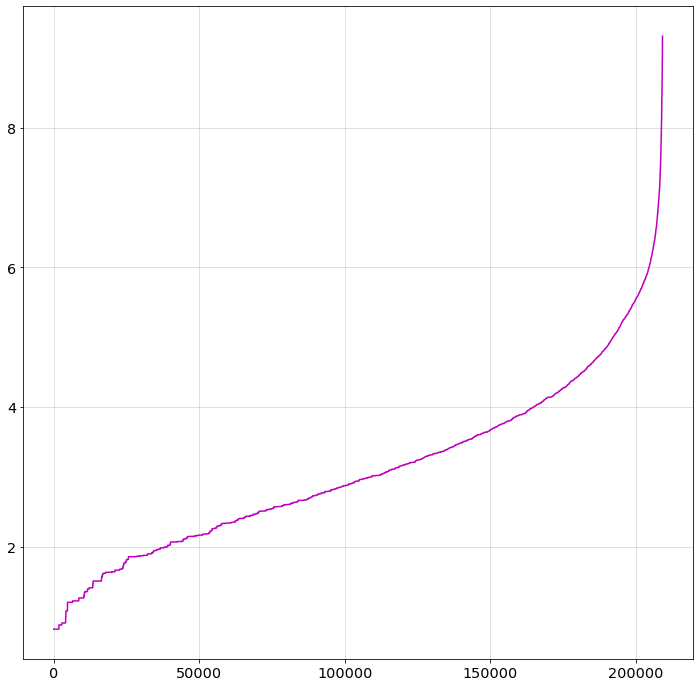

In [44]:
distance_function(X=X[list_wit_features])


In [45]:
test_clustering(X[list_wit_features],eps=1.8)

 Calinski_harabasz_score for:26 is the highest at:
131.40093768225552
 Silhouette_score for:6 is the highest at:
0.4263724604824239


In [46]:
Scan = DBSCAN(eps=1.8, min_samples=6)
cluster = Scan.fit_predict(X[list_wit_features])
print("calinski_harabasz_score:")
print(calinski_harabasz_score(X[list_wit_features],Scan.labels_))
print("silhouette_score:")
print(silhouette_score(X[list_wit_features],Scan.labels_))

calinski_harabasz_score:
105.90448080442495
silhouette_score:
0.4263724604824239


## Classification with decision trees

Decision trees can be used for classification and regression tasks. They are a non-parametric model that builds a tree-like structure, where each node represents a decision or a test on an attribute, and each branch represents the outcome of the decision or test. In this project we will use decision trees for classification.

Before creating the classification model, we will alter the properties of the "final_grade" to have labels set to above average and below average. That means that all grade values are lower than the mean of the grades in the dataset, they will be categorized as "below_average", otherwise they will be categorized as "above_average". This is to simplify the classification problem. When categorizing students based on grades, it is more important to notice students that are below average and what the reason for this is, which is why it can be good to divide the datapoints into these two features. 

In [47]:
# Multilabel sequences are considered to be continuous, while binary and multiclass types are discrete.
# In this dataset, all features are discrete.

boolean_mask = data_without_G1_G2.columns.isin(['age', 'mother_education', 'father_education', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'going_out',
       'workday_alcohol', 'weekend_alcohol', 'health', 'absences', 'school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'family_size_GT3', 'family_size_LE3', 'parent_cohabition_status_A', 'parent_cohabition_status_T', 'mother_job_at_home', 'mother_job_health',
       'mother_job_other', 'mother_job_services', 'mother_job_teacher', 'father_job_at_home', 'father_job_health', 'father_job_other','father_job_services', 
       'father_job_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 
       'school_support_yes','family_support_yes', 'paid_yes', 'extra_curricular_activities_yes', 'nursery_yes', 'higher_yes', 'internet_access_yes','romantic_yes'])
sc = data_without_G1_G2.columns[boolean_mask]

labels = ["below_average", "above_average"]

mean = data_without_G1_G2["final_grade"].mean()

conditions = [(data_without_G1_G2["final_grade"] < mean),(data_without_G1_G2["final_grade"] > mean)]


In [48]:
# Use numpy.select to apply the labels based on the conditions
data_without_G1_G2["final_grade"] = np.select(conditions, labels, default="average") # default is set to average 

y_class = data_without_G1_G2["final_grade"]
X_class = data_without_G1_G2[sc]

print(y_class)

0      below_average
1      below_average
2      above_average
3      above_average
4      above_average
           ...      
644    below_average
645    above_average
646    below_average
647    below_average
648    below_average
Name: final_grade, Length: 649, dtype: object


We will now prune a tree with cost complexity, which means controlling the tree size in order to make sure that the model does not become overly complex, which would cause it to generalize poorly to the data (overfitting). The parameter ccc_alpha is called the cost complexity parameter, it decides how many nodes will be pruned from the tree. 

In [49]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier(random_state=0)   # instantiate a tree classifier.

path = clf.cost_complexity_pruning_path(X_train_class, y_train_class)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

[]

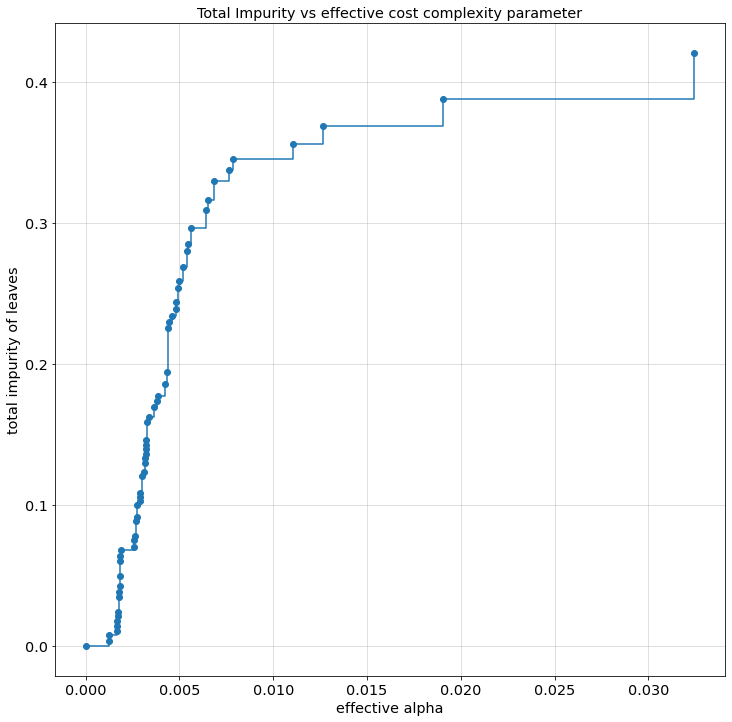

In [50]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective cost complexity parameter")
plt.grid(alpha=0.5); plt.plot()

In [51]:
classifiers = []
for ccp_alpha in ccp_alphas:
    clf.fit(X_train_class, y_train_class)
    classifiers.append(clf)
print("Number of nodes in our tree is:", classifiers[-1].tree_.node_count, "with cost complexity parameter_alpha:", ccp_alphas[-1])

Number of nodes in our tree is: 227 with cost complexity parameter_alpha: 0.0785808661597453


In [52]:
# HYPERPARAMETER TUNING #
# parameter grid for alpha values

def choose_ccp_alpha(model):
    param_grid = {'ccp_alpha': ccp_alphas}

    # Create a GridSearchCV object with cross-validation
    grid_search = GridSearchCV(clf, param_grid, cv=5)

    # Fit the GridSearchCV object on the training data
    grid_search.fit(X_train_class, y_train_class)

    return grid_search.best_params_['ccp_alpha']

# Print the best alpha value
print("Best alpha from grid search:", choose_ccp_alpha(clf))

Best alpha from grid search: 0.007650459027541653


Let us create the model for the pruned tree:

In [53]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2, random_state=0)
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = choose_ccp_alpha(clf))   # instantiate a tree classifier.
clf.fit(X_train_class, y_train_class)

DecisionTreeClassifier(ccp_alpha=0.007650459027541653, random_state=0)

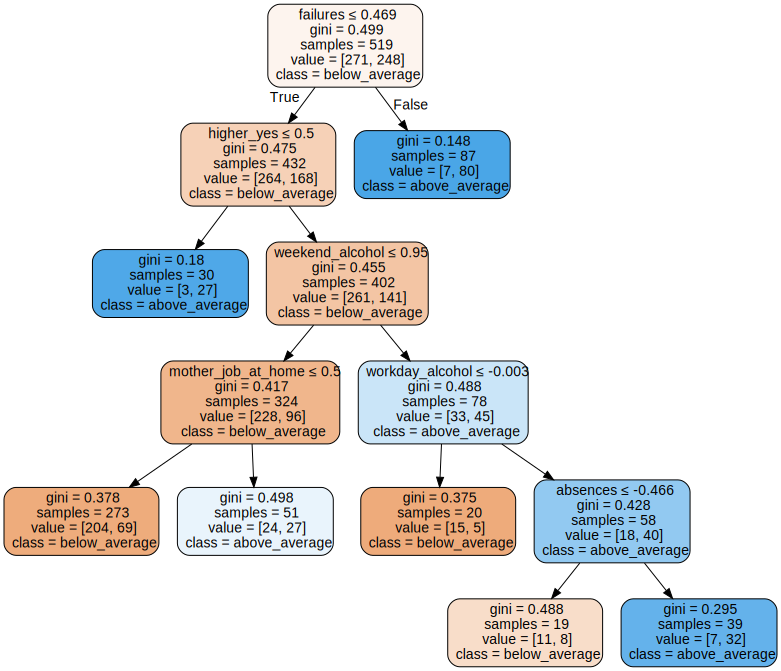

In [54]:
# PLOT THE DECISION TREE #
dot_data = export_graphviz(clf, out_file=None, feature_names=X_train_class.columns, class_names=labels, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("decision_tree")   # save the plot to a file called "decision_tree.pdf"
graph = graphviz.Source(dot_data)  
graph.format = 'png'
# graph.render('decision_tree', view=True)

graph

In [55]:
y_pred = clf.predict(X_test_class)

print("Test set preds :", y_pred)
print("Test set labels:", y_test_class)

Test set preds : ['above_average' 'below_average' 'below_average' 'below_average'
 'below_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'above_average' 'below_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'below_average'
 'above_average' 'above_average' 'below_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'above_average' 'above_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'above_average' 'below_average' 'below_average'
 'below_average' 'above_average' 'below_average' 'below_average'
 'below_average' 'below_average' 'below_average' 'above_average'
 'above_average' 'above_average' 'above_average' 'below_average'
 'above_average' 'above_average' 'below_average' 'above_average'
 'below_average' 'above_average' 'below_average' 'below_average'
 'below_average' 'below_average' 'above_average' 'above_average'
 'above_

In [56]:
print("According to this classification model, the most common grade group amongst students are:")
print(max(set(y_pred), key=y_pred.tolist().count))

According to this classification model, the most common grade group amongst students are:
above_average


In [57]:
# MEASURING HOW WELL THE MODEL DID #
print(classification_report(y_test_class, y_pred, target_names = labels))

               precision    recall  f1-score   support

below_average       0.72      0.77      0.74        77
above_average       0.62      0.57      0.59        53

     accuracy                           0.68       130
    macro avg       0.67      0.67      0.67       130
 weighted avg       0.68      0.68      0.68       130



The precision is a measure of how many positive identifications actually were correct, which in this case is pretty alright, since the value can be interpreted as a percentage of how many "positive" identifications there was in total. However, it is still not much better than if a human would have made a qualified guess, which is alarming.

The recall is a measure of what percentage of true positives that were accurately detected and the f1-score measures the model's accuracy, as it is the harmonic mean of precision and recall. Considering these definitions, the results are really not good enough to make a confident statement about the model's performance. 

In [58]:
# MAKING A CONFUSION MATRIX #

# This function is retrieved from a code example in Lecture 4 #

def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    """taken and adapted by Bob Sturm from https://gist.github.com/zachguo/10296432"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    
    # Begin CHANGES
    fst_empty_cell = (columnwidth-3)//2 * " " + "t\p" + (columnwidth-3)//2 * " "
    
    if len(fst_empty_cell) < len(empty_cell):
        fst_empty_cell = " " * (len(empty_cell) - len(fst_empty_cell)) + fst_empty_cell
    # Print header
    print("    " + fst_empty_cell, end=" ")
    # End CHANGES
    
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
        
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.2f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

        
confusion = metrics.confusion_matrix(y_test_class, y_pred)   
print_cm(confusion,labels)

         t\p      below_average above_average 
    below_average         59.00         18.00 
    above_average         23.00         30.00 


The main diagonal tells us that the number of True positives as well as the number of True negatives, and the other values are the confusions. The classifier got most of the labels correct, but way too many incorrect. Especially now that the final grade feature only have the labels "below average" and "above average". This is not good enough to be able to make a confident statement from the model.

In cells below, further feature selection are performed, specifically for the classifier.

In [59]:
# FEATURE SELECTION WITH SELECT K BEST #

# Number of features chosen will be 8.

selector = SelectKBest(score_func=mutual_info_classif, k=10)  
selector.fit(X_train_class, y_train_class)

selected_features = X_class.columns[selector.get_support()]

print("Selected features:", selected_features)

Selected features: Index(['mother_education', 'failures', 'freetime', 'workday_alcohol',
       'school_MS', 'mother_job_at_home', 'mother_job_services',
       'extra_curricular_activities_yes', 'higher_yes', 'internet_access_yes'],
      dtype='object')


In [60]:
boolean_mask = data_without_G1_G2.columns.isin(selected_features.tolist())
sc = data_without_G1_G2.columns[boolean_mask]
X_class = data_without_G1_G2[sc]

boolean_mask_target = data_without_G1_G2.columns.isin(["final_grade"])
s = data_without_G1_G2.columns[boolean_mask_target]
y_class = data_without_G1_G2[s]

In [61]:
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(X_class, y_class, test_size=0.2)
clf = tree.DecisionTreeClassifier(random_state=0, ccp_alpha = choose_ccp_alpha(clf)) 
path = clf.cost_complexity_pruning_path(X_train_class, y_train_class)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

classifiers = []
for ccp_alpha in ccp_alphas:
    clf.fit(X_train_class, y_train_class)
    classifiers.append(clf)
print("Number of nodes in our tree is:", classifiers[-1].tree_.node_count, "with cost complexity parameter_alpha:", ccp_alphas[-1], "\n")

y_pred = clf.predict(X_test_class)

print("Test set preds :", y_pred)
print("\n", "Test set labels:", y_test_class)

Number of nodes in our tree is: 11 with cost complexity parameter_alpha: 0.09024888602181452 

Test set preds : ['below_average' 'below_average' 'above_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'below_average' 'above_average' 'above_average'
 'below_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'below_average' 'below_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'below_average'
 'above_average' 'below_average' 'above_average' 'above_average'
 'below_average' 'above_average' 'below_average' 'below_average'
 'above_average' 'above_average' 'above_average' 'above_average'
 'above_average' 'below_average' 'below_average' 'below_average'
 'below_average' 'below_average' 'above_average' 'above_average'
 'above_average' 'above_average' 'above_average' 'above_average'
 'below_average' 'below_average' 'above_average' 'above_average'
 'above_average' 'above_average' 'above_ave

In [62]:
print(classification_report(y_test_class, y_pred, target_names = labels))

               precision    recall  f1-score   support

below_average       0.69      0.89      0.78        66
above_average       0.84      0.59      0.70        64

     accuracy                           0.75       130
    macro avg       0.77      0.74      0.74       130
 weighted avg       0.77      0.75      0.74       130



The results were even worse than before, which might be because of information loss, overfitting, noise, or a number of different things.

In [63]:
confusion = metrics.confusion_matrix(y_test_class, y_pred)   
print_cm(confusion,labels)

         t\p      below_average above_average 
    below_average         59.00          7.00 
    above_average         26.00         38.00 


## Discussion

We can see that having a target variable with very similar characteristics to other variables in the dataset yields overly positive results and is not a good practice for claiming that a model can make unbiased predictions. Predicting the final grade without the grades from earlier periods is more difficult, but also much more useful. With more time given, more data would need to be collected and properly preprocessed in order to actually create a model that predicts grades. The features collected would also need to be useful for the dataset in a way that all of the features in this dataset probably were not. One could also try different models and compare them to be sure that the models chosen really are the best for the data. Given more time on this project, we would have experimented further with models such as ridge regression, logistic regression, Knn clustering, Naive Bayes and Support vector machines. However, the conclusion might have been the same, that using this dataset to generalize to students and their overall grades, is just not possible.

This dataset has a quite large amount of features, most of which have different ranges and numbers with different values. This makes it harder for the models to draw conclusions from the values given in the dataset, which requires more data processing. There is also a high risk that some of the features in the data are correlated with the target variable by chance, and that they contain noise. These types of features can impact the performance of the classifier negatively. As we could see in the classification with decision trees, the model performs very badly considering that the number of labels within the target variable changed from 20 to only two labels. Despite this decrease in complexity when making the variable binary, same as the majority of the other features in the dataset, the accuracies were not much better than 50%, which would have been the expected accuracy of guessed values. The classification model is likely overfitting, which we can suspect given that the accuracies decreaced after feature selection. This is just not good enough for implementation of the model in real life situations. It is possible that more feature engineering and data cleaning would yield better results for the models, but it would require a lot of time, and in the end, it is likely still not going to be the best approach for attempting to improve school systems to help students.

Measurements of grades differ between countries, and even between schools. Drawing a conclusion for all students based on only two schools in Portugal is thereby not recommended. Furthermore, grades depend a lot on the teachers as well, which is not accounted for in this data. Since secondary school students and information about their demographics and social situation is highly personal, the best approach for understanding why they get the grades they get is probably to approach them personally and make a conclusion from their specific situation.

## Acknowledgements

In this project, the group members had meetings several times a week and divided the work so that each group member had at least one specific method or algorithm to work with. The meeting were conducted so that everyone would be able to catch up with the other members' work and ask each other questions. Everyone visualized and got acquainted with the data separately the first week, and continued visualizing the data during the entire project. Everyone also did feature selection, but different algorithms for it. Simon and Magdalena were the main responsible for working with clustering, where Simon was especially responsible for the DBScan method and Magdalena did K-means clustering. Magdalena also worked with PCA and tried different approaches to all areas. Anton also worked some with clustering and with attaining a deeper understanding of the data, in order to know how to work with it and which methods to try. He is also the main responsible for the structure of the presentation material. Kajsa was mainly responsible for trying different methods for supervised learning. She mainly worked with linear regression, lasso, feature selection and classification. She also experimented with some other methods. 

The code in this file was collected from four separate files, all uploaded to separate branches in Github. Some code was left out for the sake of coherency. Everyone contributed to the report but was especially responsible for the areas they worked closest with in the project. 

## Final meme

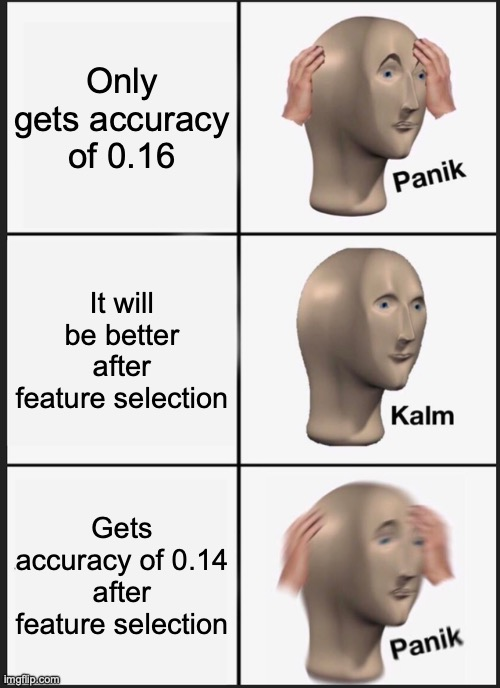

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=f34834cf-eefb-4b4e-9d3a-8921fcff33b1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>